### Reference https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection

#### prerequisite :  pip install opencv-python

In [1]:
import numpy as np
import cv2 

### Download haarcascade xml files from https://github.com/opencv/opencv/tree/master/data/haarcascades

READ LICENSE TERMS BEFORE DOWNLOADING, COPYING, INSTALLING OR USING.

#### curl -O https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml


#### curl -O https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface_extended.xml

In [2]:
cat_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')
cat_ext_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface_extended.xml')

### Set Tunable parameters

In [3]:
SF=1.05  # try different values of scale factor like 1.05, 1.3, etc
N=3 # try different values of minimum neighbours like 3,4,5,6

#### For each image 
* Read the image
* convert to gray scale
* use the above two cascades to get coordinates of rectangles
* plot the rectangles

In [4]:
def processImage(image_dir,image_filename):
    # read the image
    img = cv2.imread(image_dir+'/'+image_filename)
    # convery to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # this function returns tuple rectangle starting coordinates x,y, width, height
    cats = cat_cascade.detectMultiScale(gray, scaleFactor=SF, minNeighbors=N)
    #print(cats) # one sample value is [[268 147 234 234]]
    cats_ext = cat_ext_cascade.detectMultiScale(gray, scaleFactor=SF, minNeighbors=N)
    #print(cats_ext)
    
    # draw a blue rectangle on the image
    for (x,y,w,h) in cats:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)       
    # draw a green rectangle on the image 
    for (x,y,w,h) in cats_ext:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
    # save the image to a file
    cv2.imwrite('out'+image_filename,img)

#### There are 6 images in cats directory on which we have to run cat face detection

In [6]:
for idx in range(1,8):
    processImage('./cats/','cat'+str(idx)+'.jpg')

In [7]:
processImage('./','notcat.jpg')

### Plot the images 

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

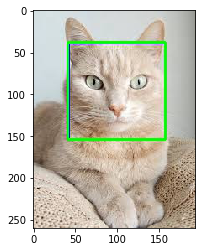

In [9]:
img = mpimg.imread('outcat1.jpg')
plt.imshow(img)

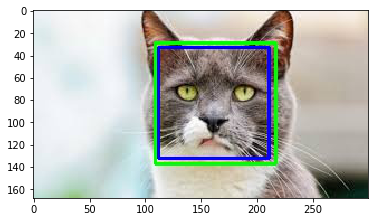

In [10]:
img = mpimg.imread('outcat2.jpg')
plt.imshow(img)

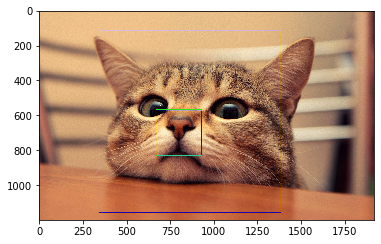

In [11]:
img = mpimg.imread('outcat3.jpg')
plt.imshow(img)

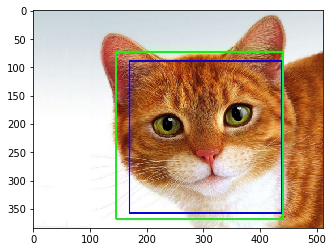

In [12]:
img = mpimg.imread('outcat4.jpg')
plt.imshow(img)

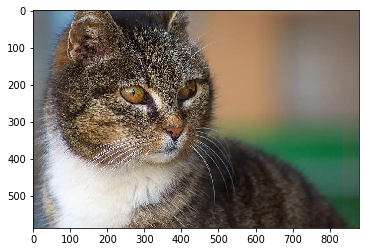

In [13]:
img = mpimg.imread('outcat5.jpg')
plt.imshow(img)

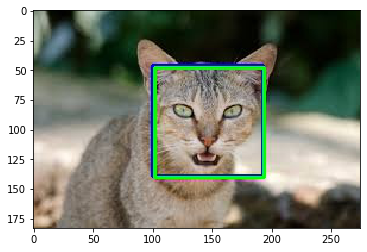

In [14]:
img = mpimg.imread('outcat6.jpg')
plt.imshow(img)

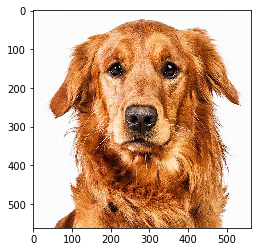

In [15]:
img = mpimg.imread('outnotcat.jpg')
plt.imshow(img)